In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_excel('well_data.xlsx', sheet_name='Data1_Completion')
df2 = pd.read_excel('well_data.xlsx', sheet_name='Data2')
df = pd.merge(df1, df2)
pd.set_option('max_column',50)
df.head()

,Unnamed: 0,LL MULTI,SAND CONC MODEL,LATERAL SPACING (M),AREA (AC),TVD(M),LATERAL LENGTH (M),STAGES,PERF CLUSTERS,SAND INTENSITY(KG.M3),FLUID INTENSITY (M3/M),INJ. RATE,PERM,PAY THICKNESS,FRACTURE 1/2 LENGTH,FRACTURE CONDUCTIVITY,REC. EFFICIENCY (GAS),DRILLING COST,COMPLETION COST,TOTAL WELL COST,IP90 GAS,IP90 COND,GAS (EUR),COND (EUR),EFFECTIVE IRR,PV(10),PV(15),Royalty,PAYOUT,LIFE,NETBACK,F&D,RECYCLE RATIO,PV15 PI
0,653,1.000,3,400,349.7,2956.900756,3500,46,92,2000.0,20.0,18,177,42,154.97467,94.973062,0.434648,3396.489455,4707.802059,8404.291514,7888.914474,980.072400,5.661301,693.568365,0.853884,6930.382442,5358.070652,0.082517,1.333333,40.000000,14.327106,5.133588,2.790856,1.664542
1,1591,0.889,2,200,263.6,2956.900756,5300,78,156,1132.1,9.5,18,177,42,116.54221,105.143550,0.682453,5152.752393,4475.043418,9927.795810,10600.657895,1322.339656,6.712743,831.895138,1.087076,9552.278968,7588.689882,0.090752,1.166667,40.000000,14.497720,5.089388,2.848618,1.796763
2,1307,0.889,4,200,199.4,2956.900756,4000,116,116,4500.0,18.0,18,177,42,169.71684,365.525890,0.734736,3884.340271,7522.065922,11706.406193,9868.421053,1225.836002,5.392724,686.276025,0.728381,7666.190920,6020.435025,0.050019,1.416667,34.166667,15.766205,7.385450,2.134766,1.536067
3,539,0.889,4,200,155.5,2956.900756,3100,34,68,4516.1,18.1,18,177,42,154.53355,317.082440,0.709425,3006.208802,5276.606255,8582.815057,5897.587719,733.098023,4.067688,501.384134,0.409468,4064.735533,2771.923567,0.048097,2.083333,36.583333,14.814777,7.277691,2.035642,1.336641
4,682,1.000,4,300,263.3,2956.900756,3500,34,68,3000.0,12.0,18,177,42,140.73170,310.171940,0.523262,3396.489455,4233.663765,7930.153221,5629.418860,705.628719,5.131829,615.644046,0.468071,5073.862174,3468.582212,0.065236,2.000000,40.000000,14.407753,5.391182,2.672466,1.455917


In [3]:
df['FRACTURE 1/2 LENGTH'].value_counts()

232.089560    13
169.251780    12
155.941530    11
187.034880    11
140.562500    11
              ..
190.748290     1
117.790470     1
87.959579      1
116.427400     1
231.999330     1
Name: FRACTURE 1/2 LENGTH, Length: 391, dtype: int64

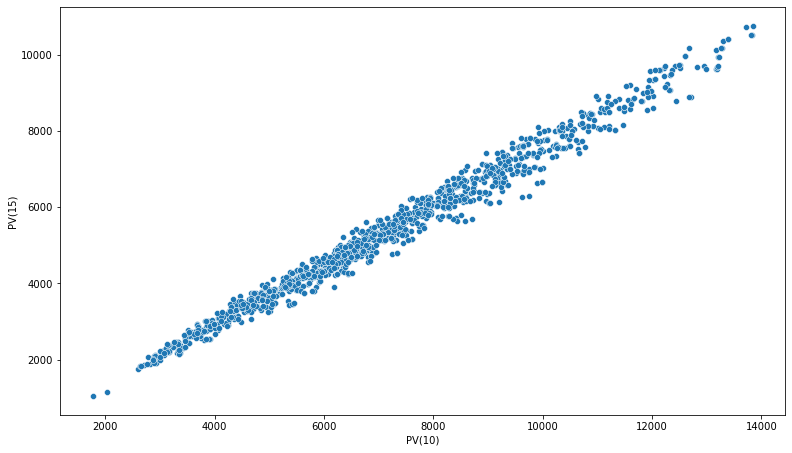

In [4]:
plt.figure(figsize=(13, 7.5))
sns.scatterplot(data=df, x='PV(10)', y='PV(15)');

PV(10) and PV(15) are linearly correlated; PV(10) increases as PV(15) decreases

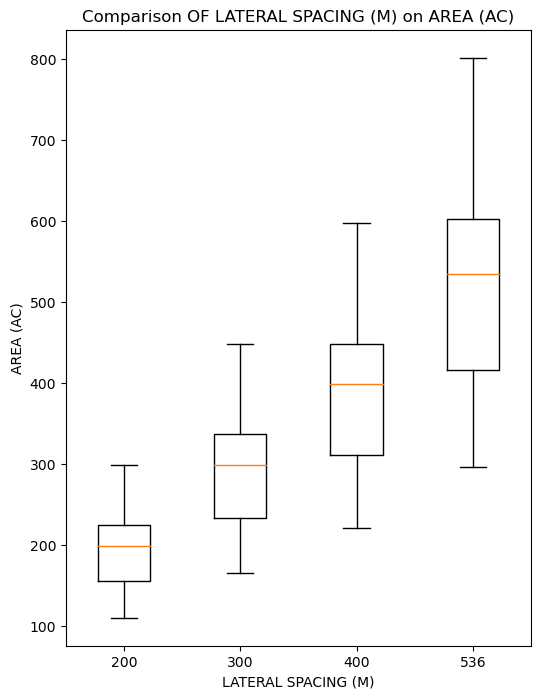

In [5]:
plt.style.use('default')

plt.figure(figsize = (6,8))

two_hundred = df.loc[df['LATERAL SPACING (M)'] == 200]['AREA (AC)']
three_hundred = df.loc[df['LATERAL SPACING (M)'] == 300]['AREA (AC)']
four_hundred = df.loc[df['LATERAL SPACING (M)'] == 400]['AREA (AC)']
five_hundred = df.loc[df['LATERAL SPACING (M)'] == 536]['AREA (AC)']

boxplot_labels = ['200', '300', '400','536']

plt.boxplot([two_hundred, three_hundred, four_hundred,five_hundred], labels = boxplot_labels)

plt.title('Comparison OF LATERAL SPACING (M) on AREA (AC)')
plt.ylabel('AREA (AC)')
plt.xlabel('LATERAL SPACING (M)')

plt.show()

The box plot above compares the statistics (min, max, quartiles) of AREA (AC) values for LATERAL SPACING (M).
The statistics have higher values as LATERAL SPACING (M) increases i.e the AREA (AC) increases as LATERAL SPACING (M) increases

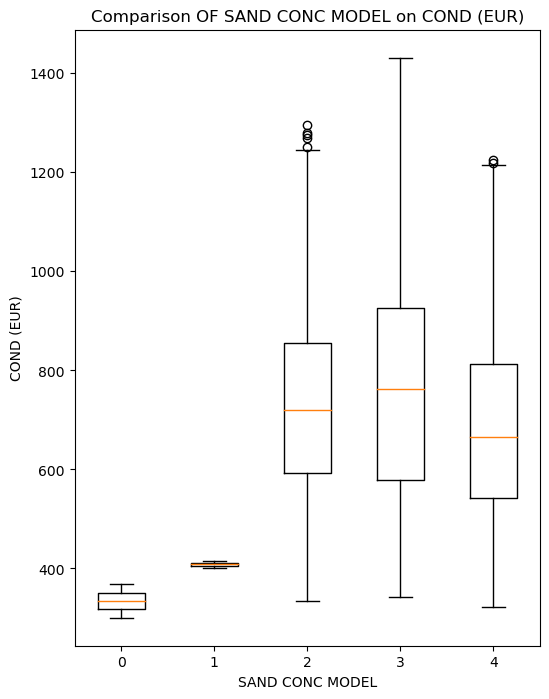

In [6]:
plt.style.use('default')

plt.figure(figsize = (6,8))

zero = df.loc[df['SAND CONC MODEL'] == 0]['COND (EUR)']
one = df.loc[df['SAND CONC MODEL'] == 1]['COND (EUR)']
two = df.loc[df['SAND CONC MODEL'] == 2]['COND (EUR)']
three = df.loc[df['SAND CONC MODEL'] == 3]['COND (EUR)']
four = df.loc[df['SAND CONC MODEL'] == 4]['COND (EUR)']

boxplot_labels2 = ['0', '1', '2','3', '4']

plt.boxplot([zero, one, two, three, four], labels = boxplot_labels2)

plt.title('Comparison OF SAND CONC MODEL on COND (EUR)')
plt.ylabel('COND (EUR)')
plt.xlabel('SAND CONC MODEL')

plt.show()

The data points with SAND CONC MODEL of 3 have the highest values in COND (EUR).
Data points with SAND CONC MODEL of 0 & 1 have few occurences.
The data points with SAND CONC MODEL of 2 & 4 has some extreme values.


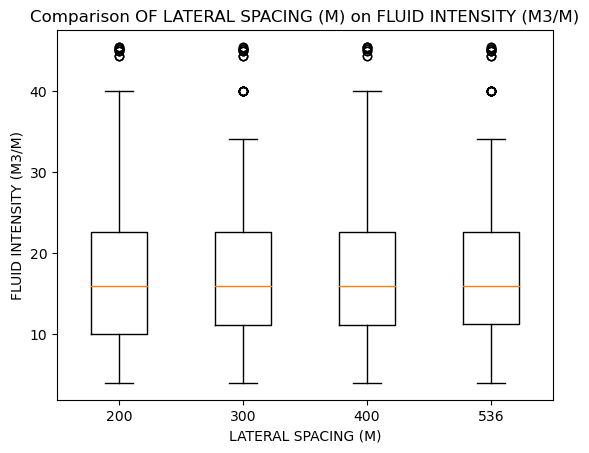

In [7]:
# FLUID INTENSITY (M3/M)
two_hundred = df.loc[df['LATERAL SPACING (M)'] == 200]['FLUID INTENSITY (M3/M)']
three_hundred = df.loc[df['LATERAL SPACING (M)'] == 300]['FLUID INTENSITY (M3/M)']
four_hundred = df.loc[df['LATERAL SPACING (M)'] == 400]['FLUID INTENSITY (M3/M)']
five_hundred = df.loc[df['LATERAL SPACING (M)'] == 536]['FLUID INTENSITY (M3/M)']

boxplot_labels = ['200', '300', '400','536']

plt.boxplot([two_hundred, three_hundred, four_hundred,five_hundred], labels = boxplot_labels)

plt.title('Comparison OF LATERAL SPACING (M) on FLUID INTENSITY (M3/M)')
plt.ylabel('FLUID INTENSITY (M3/M)')
plt.xlabel('LATERAL SPACING (M)')

plt.show()

LATERAL SPACING (M) of values 200 and 400 have data points with higher maximum values on FLUID INTENSITY (M3/M).
All LATERAL SPACING (M) values have extreme values.